## Assignment 0 IPYNB

## TASK 2

In [910]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import cg, eigs

a = np.arange(1, 61).reshape(10, 6)
b = np.arange(61, 121).reshape(10, 6)
c = np.array([[1., 2.], [3., 4.]])
d = np.array([[5., 6.], [7., 8.]])
v = np.array([0.2, 0.7, 0.9, 0.1, 0.55, 0.8])
v_col = v[:, np.newaxis]
I3 = np.eye(3)
diag_vec = np.array([1., 2., 3.])
rng = np.random.default_rng(42)
A2 = np.array([[3., 1.], [1., 2.]])
Z = np.random.rand(10, 3)   # 10x3
y = np.random.rand(10)

In [911]:
np.ndim ( a )

2

In [912]:
np.size ( a )

60

In [913]:
a.shape

(10, 6)

In [914]:
a.shape[1]

6

In [915]:
np . array ([[1. ,2. ,3.] ,[4. ,5. ,6.]])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [916]:
np . block ([[ c , d ] ,[d , c ]])

array([[1., 2., 5., 6.],
       [3., 4., 7., 8.],
       [5., 6., 1., 2.],
       [7., 8., 3., 4.]])

In [917]:
a [ -1]

array([55, 56, 57, 58, 59, 60])

In [918]:
a [1 ,4]

np.int64(11)

In [919]:
a [1 ,:]

array([ 7,  8,  9, 10, 11, 12])

In [920]:
a [:5 ,:]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [921]:
a[-5:]

array([[31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42],
       [43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59, 60]])

In [922]:
a[0:3,4:9]

array([[ 5,  6],
       [11, 12],
       [17, 18]])

In [923]:
a[np.ix_([1, 3, 4], [0, 2])]

array([[ 7,  9],
       [19, 21],
       [25, 27]])

In [924]:
a[2:21:2,:]

array([[13, 14, 15, 16, 17, 18],
       [25, 26, 27, 28, 29, 30],
       [37, 38, 39, 40, 41, 42],
       [49, 50, 51, 52, 53, 54]])

In [925]:
a[::2, :]

array([[ 1,  2,  3,  4,  5,  6],
       [13, 14, 15, 16, 17, 18],
       [25, 26, 27, 28, 29, 30],
       [37, 38, 39, 40, 41, 42],
       [49, 50, 51, 52, 53, 54]])

In [926]:
a[::-1,:]

array([[55, 56, 57, 58, 59, 60],
       [49, 50, 51, 52, 53, 54],
       [43, 44, 45, 46, 47, 48],
       [37, 38, 39, 40, 41, 42],
       [31, 32, 33, 34, 35, 36],
       [25, 26, 27, 28, 29, 30],
       [19, 20, 21, 22, 23, 24],
       [13, 14, 15, 16, 17, 18],
       [ 7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6]])

In [927]:
a[np.r_[:len(a),0]]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42],
       [43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59, 60],
       [ 1,  2,  3,  4,  5,  6]])

In [928]:
a.transpose()

array([[ 1,  7, 13, 19, 25, 31, 37, 43, 49, 55],
       [ 2,  8, 14, 20, 26, 32, 38, 44, 50, 56],
       [ 3,  9, 15, 21, 27, 33, 39, 45, 51, 57],
       [ 4, 10, 16, 22, 28, 34, 40, 46, 52, 58],
       [ 5, 11, 17, 23, 29, 35, 41, 47, 53, 59],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]])

In [929]:
a.conj().transpose()

array([[ 1,  7, 13, 19, 25, 31, 37, 43, 49, 55],
       [ 2,  8, 14, 20, 26, 32, 38, 44, 50, 56],
       [ 3,  9, 15, 21, 27, 33, 39, 45, 51, 57],
       [ 4, 10, 16, 22, 28, 34, 40, 46, 52, 58],
       [ 5, 11, 17, 23, 29, 35, 41, 47, 53, 59],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]])

In [930]:
a @ b.T


array([[ 1351,  1477,  1603,  1729,  1855,  1981,  2107,  2233,  2359,
         2485],
       [ 3637,  3979,  4321,  4663,  5005,  5347,  5689,  6031,  6373,
         6715],
       [ 5923,  6481,  7039,  7597,  8155,  8713,  9271,  9829, 10387,
        10945],
       [ 8209,  8983,  9757, 10531, 11305, 12079, 12853, 13627, 14401,
        15175],
       [10495, 11485, 12475, 13465, 14455, 15445, 16435, 17425, 18415,
        19405],
       [12781, 13987, 15193, 16399, 17605, 18811, 20017, 21223, 22429,
        23635],
       [15067, 16489, 17911, 19333, 20755, 22177, 23599, 25021, 26443,
        27865],
       [17353, 18991, 20629, 22267, 23905, 25543, 27181, 28819, 30457,
        32095],
       [19639, 21493, 23347, 25201, 27055, 28909, 30763, 32617, 34471,
        36325],
       [21925, 23995, 26065, 28135, 30205, 32275, 34345, 36415, 38485,
        40555]])

In [931]:
a * b

array([[  61,  124,  189,  256,  325,  396],
       [ 469,  544,  621,  700,  781,  864],
       [ 949, 1036, 1125, 1216, 1309, 1404],
       [1501, 1600, 1701, 1804, 1909, 2016],
       [2125, 2236, 2349, 2464, 2581, 2700],
       [2821, 2944, 3069, 3196, 3325, 3456],
       [3589, 3724, 3861, 4000, 4141, 4284],
       [4429, 4576, 4725, 4876, 5029, 5184],
       [5341, 5500, 5661, 5824, 5989, 6156],
       [6325, 6496, 6669, 6844, 7021, 7200]])

In [932]:
a/b

array([[0.01639344, 0.03225806, 0.04761905, 0.0625    , 0.07692308,
        0.09090909],
       [0.10447761, 0.11764706, 0.13043478, 0.14285714, 0.15492958,
        0.16666667],
       [0.17808219, 0.18918919, 0.2       , 0.21052632, 0.22077922,
        0.23076923],
       [0.24050633, 0.25      , 0.25925926, 0.26829268, 0.27710843,
        0.28571429],
       [0.29411765, 0.30232558, 0.31034483, 0.31818182, 0.3258427 ,
        0.33333333],
       [0.34065934, 0.34782609, 0.35483871, 0.36170213, 0.36842105,
        0.375     ],
       [0.3814433 , 0.3877551 , 0.39393939, 0.4       , 0.40594059,
        0.41176471],
       [0.41747573, 0.42307692, 0.42857143, 0.43396226, 0.43925234,
        0.44444444],
       [0.44954128, 0.45454545, 0.45945946, 0.46428571, 0.46902655,
        0.47368421],
       [0.47826087, 0.48275862, 0.48717949, 0.49152542, 0.49579832,
        0.5       ]])

In [933]:
a**3

array([[     1,      8,     27,     64,    125,    216],
       [   343,    512,    729,   1000,   1331,   1728],
       [  2197,   2744,   3375,   4096,   4913,   5832],
       [  6859,   8000,   9261,  10648,  12167,  13824],
       [ 15625,  17576,  19683,  21952,  24389,  27000],
       [ 29791,  32768,  35937,  39304,  42875,  46656],
       [ 50653,  54872,  59319,  64000,  68921,  74088],
       [ 79507,  85184,  91125,  97336, 103823, 110592],
       [117649, 125000, 132651, 140608, 148877, 157464],
       [166375, 175616, 185193, 195112, 205379, 216000]])

In [934]:
(a>0.5)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [935]:
np.nonzero(a > 0.5)

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9]),
 array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
        4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1,
        2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]))

In [936]:
a[:,np.nonzero(v > 0.5)[0]]

array([[ 2,  3,  5,  6],
       [ 8,  9, 11, 12],
       [14, 15, 17, 18],
       [20, 21, 23, 24],
       [26, 27, 29, 30],
       [32, 33, 35, 36],
       [38, 39, 41, 42],
       [44, 45, 47, 48],
       [50, 51, 53, 54],
       [56, 57, 59, 60]])

In [937]:
a[:, v.T > 0.5]

array([[ 2,  3,  5,  6],
       [ 8,  9, 11, 12],
       [14, 15, 17, 18],
       [20, 21, 23, 24],
       [26, 27, 29, 30],
       [32, 33, 35, 36],
       [38, 39, 41, 42],
       [44, 45, 47, 48],
       [50, 51, 53, 54],
       [56, 57, 59, 60]])

In [938]:
a[a < 0.5]=0

In [939]:
a * (a > 0.5)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36],
       [37, 38, 39, 40, 41, 42],
       [43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59, 60]])

In [940]:
a[:] = 3

In [941]:
x = np.arange(1, 13).reshape(3, 4)
y = x.copy()
print(x)
print(y)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [942]:
y = x[1, :].copy()
y

array([5, 6, 7, 8])

In [943]:
y = x.flatten()
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [944]:
np.arange(1., 11.)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [945]:
np.r_[1.:11.]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [946]:
np.r_[1:10:10j]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [947]:
np.arange(10.)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [948]:
np.r_[:10.]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [949]:
np.r_[:9:10j]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [950]:
np.arange(1.,11.)[:, np.newaxis]

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [951]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [952]:
np.zeros((3, 4, 5))

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [953]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [954]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [955]:
np.diag(a)

array([3, 3, 3, 3, 3, 3])

In [956]:
np.diag(v, 0)

array([[0.2 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.7 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.9 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.55, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.8 ]])

In [957]:
from numpy.random import default_rng
rng = default_rng(42)
rng.random((3, 4))

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499]])

In [958]:
np.linspace(1,3,4)

array([1.        , 1.66666667, 2.33333333, 3.        ])

In [959]:
np.mgrid[0:9.,0:6.]

array([[[0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7., 7.],
        [8., 8., 8., 8., 8., 8.]],

       [[0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.]]])

In [960]:
np.ix_(np.r_[0:9.], np.r_[0:6.])

(array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]]),
 array([[0., 1., 2., 3., 4., 5.]]))

In [961]:
np.meshgrid([1,2,4],[2,4,5])

(array([[1, 2, 4],
        [1, 2, 4],
        [1, 2, 4]]),
 array([[2, 2, 2],
        [4, 4, 4],
        [5, 5, 5]]))

In [962]:
np.ix_([1,2,4],[2,4,5])


(array([[1],
        [2],
        [4]]),
 array([[2, 4, 5]]))

In [963]:
	np.tile(a, (2, 3))

array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [964]:
np.concatenate((a,b),1)

array([[  3,   3,   3,   3,   3,   3,  61,  62,  63,  64,  65,  66],
       [  3,   3,   3,   3,   3,   3,  67,  68,  69,  70,  71,  72],
       [  3,   3,   3,   3,   3,   3,  73,  74,  75,  76,  77,  78],
       [  3,   3,   3,   3,   3,   3,  79,  80,  81,  82,  83,  84],
       [  3,   3,   3,   3,   3,   3,  85,  86,  87,  88,  89,  90],
       [  3,   3,   3,   3,   3,   3,  91,  92,  93,  94,  95,  96],
       [  3,   3,   3,   3,   3,   3,  97,  98,  99, 100, 101, 102],
       [  3,   3,   3,   3,   3,   3, 103, 104, 105, 106, 107, 108],
       [  3,   3,   3,   3,   3,   3, 109, 110, 111, 112, 113, 114],
       [  3,   3,   3,   3,   3,   3, 115, 116, 117, 118, 119, 120]])

In [965]:
np.hstack((a,b))

array([[  3,   3,   3,   3,   3,   3,  61,  62,  63,  64,  65,  66],
       [  3,   3,   3,   3,   3,   3,  67,  68,  69,  70,  71,  72],
       [  3,   3,   3,   3,   3,   3,  73,  74,  75,  76,  77,  78],
       [  3,   3,   3,   3,   3,   3,  79,  80,  81,  82,  83,  84],
       [  3,   3,   3,   3,   3,   3,  85,  86,  87,  88,  89,  90],
       [  3,   3,   3,   3,   3,   3,  91,  92,  93,  94,  95,  96],
       [  3,   3,   3,   3,   3,   3,  97,  98,  99, 100, 101, 102],
       [  3,   3,   3,   3,   3,   3, 103, 104, 105, 106, 107, 108],
       [  3,   3,   3,   3,   3,   3, 109, 110, 111, 112, 113, 114],
       [  3,   3,   3,   3,   3,   3, 115, 116, 117, 118, 119, 120]])

In [966]:
np.column_stack((a,b))

array([[  3,   3,   3,   3,   3,   3,  61,  62,  63,  64,  65,  66],
       [  3,   3,   3,   3,   3,   3,  67,  68,  69,  70,  71,  72],
       [  3,   3,   3,   3,   3,   3,  73,  74,  75,  76,  77,  78],
       [  3,   3,   3,   3,   3,   3,  79,  80,  81,  82,  83,  84],
       [  3,   3,   3,   3,   3,   3,  85,  86,  87,  88,  89,  90],
       [  3,   3,   3,   3,   3,   3,  91,  92,  93,  94,  95,  96],
       [  3,   3,   3,   3,   3,   3,  97,  98,  99, 100, 101, 102],
       [  3,   3,   3,   3,   3,   3, 103, 104, 105, 106, 107, 108],
       [  3,   3,   3,   3,   3,   3, 109, 110, 111, 112, 113, 114],
       [  3,   3,   3,   3,   3,   3, 115, 116, 117, 118, 119, 120]])

In [967]:
np.c_[a,b]

array([[  3,   3,   3,   3,   3,   3,  61,  62,  63,  64,  65,  66],
       [  3,   3,   3,   3,   3,   3,  67,  68,  69,  70,  71,  72],
       [  3,   3,   3,   3,   3,   3,  73,  74,  75,  76,  77,  78],
       [  3,   3,   3,   3,   3,   3,  79,  80,  81,  82,  83,  84],
       [  3,   3,   3,   3,   3,   3,  85,  86,  87,  88,  89,  90],
       [  3,   3,   3,   3,   3,   3,  91,  92,  93,  94,  95,  96],
       [  3,   3,   3,   3,   3,   3,  97,  98,  99, 100, 101, 102],
       [  3,   3,   3,   3,   3,   3, 103, 104, 105, 106, 107, 108],
       [  3,   3,   3,   3,   3,   3, 109, 110, 111, 112, 113, 114],
       [  3,   3,   3,   3,   3,   3, 115, 116, 117, 118, 119, 120]])

In [968]:
np.concatenate((a,b))

array([[  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120]])

In [969]:
np.vstack((a,b))

array([[  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120]])

In [970]:
np.r_[a,b]

array([[  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [  3,   3,   3,   3,   3,   3],
       [ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120]])

In [971]:
a.max()

np.int64(3)

In [972]:
np.nanmax(a)

np.int64(3)

In [973]:
a.max(0)

array([3, 3, 3, 3, 3, 3])

In [974]:
a.max(1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [975]:
np.maximum(a, b)

array([[ 61,  62,  63,  64,  65,  66],
       [ 67,  68,  69,  70,  71,  72],
       [ 73,  74,  75,  76,  77,  78],
       [ 79,  80,  81,  82,  83,  84],
       [ 85,  86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95,  96],
       [ 97,  98,  99, 100, 101, 102],
       [103, 104, 105, 106, 107, 108],
       [109, 110, 111, 112, 113, 114],
       [115, 116, 117, 118, 119, 120]])

In [976]:
np.sqrt(v @ v)

np.float64(1.514100392972672)

In [977]:
np.linalg.norm(v)

np.float64(1.514100392972672)

In [978]:
np.logical_and(a, b)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [979]:
np.logical_or(a,b)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [980]:
a & b

array([[1, 2, 3, 0, 1, 2],
       [3, 0, 1, 2, 3, 0],
       [1, 2, 3, 0, 1, 2],
       [3, 0, 1, 2, 3, 0],
       [1, 2, 3, 0, 1, 2],
       [3, 0, 1, 2, 3, 0],
       [1, 2, 3, 0, 1, 2],
       [3, 0, 1, 2, 3, 0],
       [1, 2, 3, 0, 1, 2],
       [3, 0, 1, 2, 3, 0]])

In [981]:
a | b

array([[ 63,  63,  63,  67,  67,  67],
       [ 67,  71,  71,  71,  71,  75],
       [ 75,  75,  75,  79,  79,  79],
       [ 79,  83,  83,  83,  83,  87],
       [ 87,  87,  87,  91,  91,  91],
       [ 91,  95,  95,  95,  95,  99],
       [ 99,  99,  99, 103, 103, 103],
       [103, 107, 107, 107, 107, 111],
       [111, 111, 111, 115, 115, 115],
       [115, 119, 119, 119, 119, 123]])

In [982]:

a2 = np.array([[3., 1., 2.],
               [1., 4., 5.],
               [2., 5., 6.]])
linalg.inv(a2)


array([[ 0.2, -0.8,  0.6],
       [-0.8, -2.8,  2.6],
       [ 0.6,  2.6, -2.2]])

In [983]:
linalg.pinv(a)

array([[0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556,
        0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556],
       [0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556,
        0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556],
       [0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556,
        0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556],
       [0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556,
        0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556],
       [0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556,
        0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556],
       [0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556,
        0.00555556, 0.00555556, 0.00555556, 0.00555556, 0.00555556]])

In [984]:
np.linalg.matrix_rank(a)

np.int64(1)

In [985]:
linalg.lstsq(a, b)

(array([[4.88888889, 4.94444444, 5.        , 5.05555556, 5.11111111,
         5.16666667],
        [4.88888889, 4.94444444, 5.        , 5.05555556, 5.11111111,
         5.16666667],
        [4.88888889, 4.94444444, 5.        , 5.05555556, 5.11111111,
         5.16666667],
        [4.88888889, 4.94444444, 5.        , 5.05555556, 5.11111111,
         5.16666667],
        [4.88888889, 4.94444444, 5.        , 5.05555556, 5.11111111,
         5.16666667],
        [4.88888889, 4.94444444, 5.        , 5.05555556, 5.11111111,
         5.16666667]]),
 array([], dtype=float64),
 1,
 array([2.32379001e+01, 5.61666131e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]))

In [986]:
X, *_ = la.lstsq(a.T, b.T)
X = X.T
X

array([[2.11666667, 2.11666667, 2.11666667, 2.11666667, 2.11666667,
        2.11666667, 2.11666667, 2.11666667, 2.11666667, 2.11666667],
       [2.31666667, 2.31666667, 2.31666667, 2.31666667, 2.31666667,
        2.31666667, 2.31666667, 2.31666667, 2.31666667, 2.31666667],
       [2.51666667, 2.51666667, 2.51666667, 2.51666667, 2.51666667,
        2.51666667, 2.51666667, 2.51666667, 2.51666667, 2.51666667],
       [2.71666667, 2.71666667, 2.71666667, 2.71666667, 2.71666667,
        2.71666667, 2.71666667, 2.71666667, 2.71666667, 2.71666667],
       [2.91666667, 2.91666667, 2.91666667, 2.91666667, 2.91666667,
        2.91666667, 2.91666667, 2.91666667, 2.91666667, 2.91666667],
       [3.11666667, 3.11666667, 3.11666667, 3.11666667, 3.11666667,
        3.11666667, 3.11666667, 3.11666667, 3.11666667, 3.11666667],
       [3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
        3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667],
       [3.51666667, 3.51666667, 3.5166666

In [987]:

U, S, Vh = linalg.svd(a); V = Vh.T
print(U,S,Vh)

[[-3.16227766e-01  9.48683298e-01 -1.46284728e-18 -1.46284728e-18
   1.68034824e-17  1.68034824e-17 -1.46284728e-18 -1.46284728e-18
  -6.02942969e-18 -1.56967162e-17]
 [-3.16227766e-01 -1.05409255e-01 -3.33333333e-01 -3.33333333e-01
  -3.33333333e-01 -3.33333333e-01 -3.33333333e-01 -3.33333333e-01
  -3.33333333e-01 -3.33333333e-01]
 [-3.16227766e-01 -1.05409255e-01 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02  9.16666667e-01 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02]
 [-3.16227766e-01 -1.05409255e-01 -8.33333333e-02 -8.33333333e-02
   9.16666667e-01 -8.33333333e-02 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02]
 [-3.16227766e-01 -1.05409255e-01  9.16666667e-01 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02]
 [-3.16227766e-01 -1.05409255e-01 -8.33333333e-02  9.16666667e-01
  -8.33333333e-02 -8.33333333e-02 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02

In [988]:
cholesky = np.array([[3., 1.],
               [1., 2.]])

L = la.cholesky(cholesky)
L

array([[1.73205081, 0.57735027],
       [0.        , 1.29099445]])

In [989]:
D,V = linalg.eig(a2)

print(D)
print(V)



[10.71704321+0.j  2.47171128+0.j -0.18875449+0.j]
[[ 0.27264929  0.94543361 -0.17837501]
 [ 0.60027549 -0.31204863 -0.73640681]
 [ 0.75188543 -0.09370664  0.65260047]]


In [990]:
a2 = np.array([[3., 1.],
               [1., 2.]])
D, V = linalg.eig(a2, c)

print(D)
print(V)

[-5. +0.j  0.5+0.j]
[[ 8.08736084e-01 -8.97877422e-17]
 [-5.88171698e-01  1.00000000e+00]]


In [991]:
D, V = linalg.eig(a2)
print(D)
print(V)

[3.61803399+0.j 1.38196601+0.j]
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [992]:
Q,R = linalg.qr(a)
print(Q)
print(R)

[[-3.16227766e-01  9.48683298e-01  1.68034824e-17  1.68034824e-17
  -1.46284728e-18 -1.46284728e-18 -1.46284728e-18 -1.46284728e-18
  -6.02942969e-18 -1.56967162e-17]
 [-3.16227766e-01 -1.05409255e-01 -3.33333333e-01 -3.33333333e-01
  -3.33333333e-01 -3.33333333e-01 -3.33333333e-01 -3.33333333e-01
  -3.33333333e-01 -3.33333333e-01]
 [-3.16227766e-01 -1.05409255e-01  9.16666667e-01 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02]
 [-3.16227766e-01 -1.05409255e-01 -8.33333333e-02  9.16666667e-01
  -8.33333333e-02 -8.33333333e-02 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02]
 [-3.16227766e-01 -1.05409255e-01 -8.33333333e-02 -8.33333333e-02
   9.16666667e-01 -8.33333333e-02 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02]
 [-3.16227766e-01 -1.05409255e-01 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02  9.16666667e-01 -8.33333333e-02 -8.33333333e-02
  -8.33333333e-02 -8.33333333e-02

In [993]:
P,L,U = linalg.lu(a)
print(P)
print(L)
print(U)
print(a == P@L@U)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[3. 3. 3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True

In [994]:
cg

<function scipy.sparse.linalg._isolve.iterative.cg(A, b, x0=None, *, rtol=1e-05, atol=0.0, maxiter=None, M=None, callback=None)>

In [995]:
np.fft.fft(a)

array([[18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [18.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

In [996]:
np.fft.ifft(a)

array([[3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [3.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [997]:
np.sort(a)

array([[3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3]])

In [998]:
a.sort(axis=0)

In [999]:
np.sort(a, axis=1)

array([[3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3]])

In [1000]:
I = np.argsort(a[:, 0]); b = a[I,:]
I

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [1001]:
Z = np.random.rand(12, 3)
z, *_ = linalg.lstsq(Z, y)
print("Solution z:\n", z)

Solution z:
 [ 8.72320072  7.19998401 -3.82541244]


In [1002]:
x = np.linspace(0, 1, 20)
q = 2
signal.resample(x, int(np.ceil(len(x) / q)))

array([0.23684211, 0.06243413, 0.218361  , 0.32362416, 0.40307287,
       0.55263158, 0.59692713, 0.781639  , 0.781639  , 1.04282903])

In [1003]:
np.unique(a)

array([3])

In [1004]:
a.squeeze()

array([[3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3, 3]])

## TASK 3

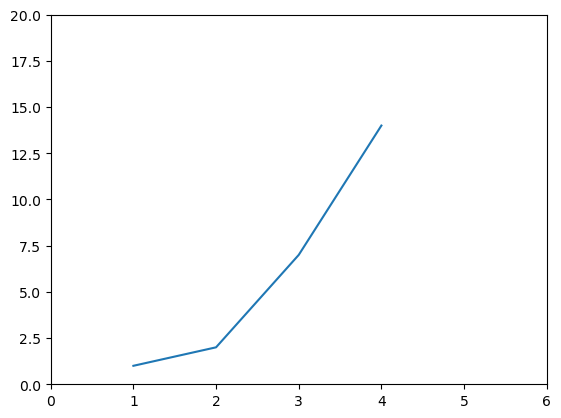

In [1005]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,2,7,14])
plt.axis([0, 6, 0, 20])
plt.show()

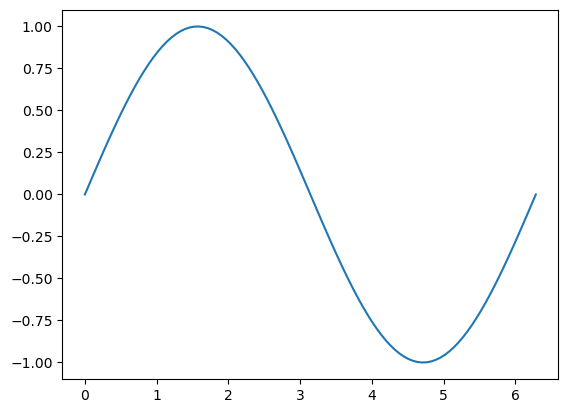

In [1006]:
import matplotlib . pyplot as plt
x = np . linspace (0 , 2* np . pi , 100)
plt . plot (x , np . sin ( x ) )
plt . show ()